### **IMPORT LIBRARY**

In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

# **EKSPLORASI DATA**

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

# **PREPOCESSING DATA**

In [ ]:
#normalisasi
train_images = train_images / 255.0

test_images = test_images / 255.0

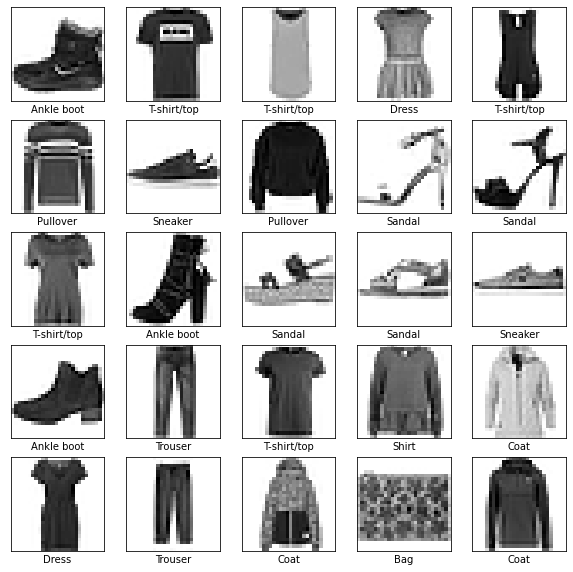

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

# **MODEL**

**PENGATURAN LAYER**

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10, activation='softmax')
])

**KOMPILASI MODEL**

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# **TRAINING DATA**

In [ ]:
model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.5014 - accuracy: 0.8235
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3772 - accuracy: 0.8645
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3370 - accuracy: 0.8772
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3121 - accuracy: 0.8857
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2948 - accuracy: 0.8906
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2834 - accuracy: 0.8954
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2680 - accuracy: 0.9000
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2561 - accuracy: 0.9043
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2469 - accuracy: 0.9080
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.240

# **EVALUASI AKURASI**

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 1s - loss: 0.3331 - accuracy: 0.8896

Test accuracy: 0.8895999789237976


# **PREDIKSI**

In [ ]:
predictions = model.predict(test_images)

In [ ]:
predictions[5]

array([4.2021425e-06, 9.9999452e-01, 1.6357683e-09, 1.0569088e-06,
       5.8381378e-08, 1.8565257e-17, 1.4549575e-07, 1.9332380e-24,
       5.3805660e-10, 1.3619179e-14], dtype=float32)

In [ ]:
np.argmax(predictions[5])

1

In [ ]:
test_labels[5]

1

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  predictions_array, true_label, img = predictions_array, true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  predictions_array, true_label = predictions_array, true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

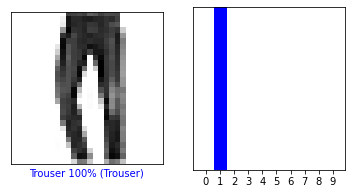

In [ ]:
i = 5
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

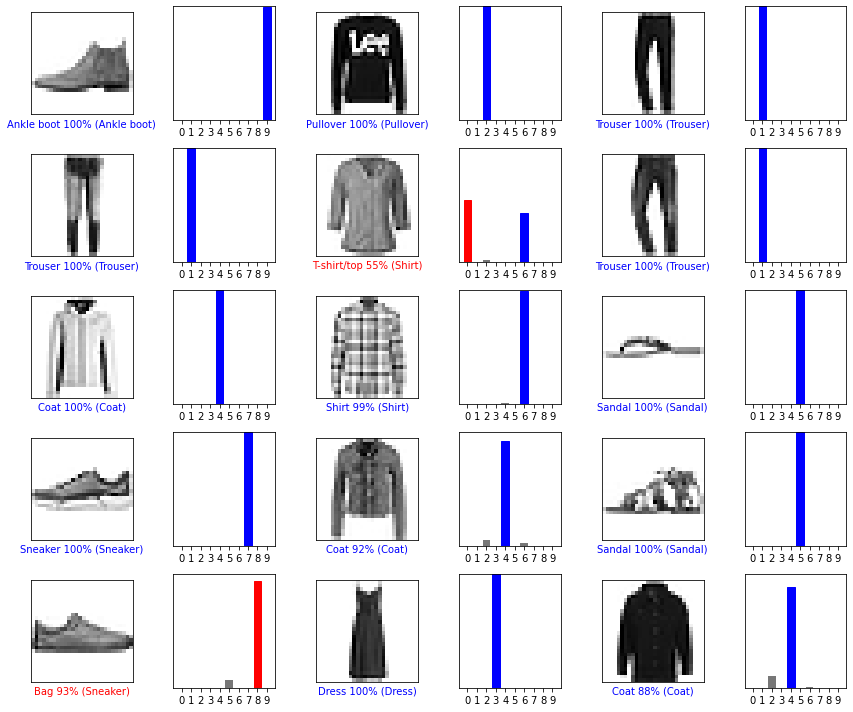

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()